# Interpretation

Code based in the image recognition of LIME

Import the neccesary libraries

In [1]:
import tensorflow as tf
slim = tf.contrib.slim
import sys
#sys.path.append('/Users/marcotcr/phd/tf-models/slim')
sys.path.append('/home/mlvm2/tf-models/slim')
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nets import inception
from preprocessing import inception_preprocessing
from datasets import imagenet
import os
from lime import lime_image
import time
from skimage.segmentation import mark_boundaries

Create a predict fn for inception v3, returns the possible predictions

In [2]:
session = tf.Session()

In [3]:
image_size = inception.inception_v3.default_image_size
def transform_img_fn(path_list):
    out = []
    for f in path_list:
        #image_raw = tf.image.decode_jpeg(open(f).read(), channels=3)
        image_raw = tf.image.decode_jpeg(open(f, 'rb').read(), channels=3)
        image = inception_preprocessing.preprocess_image(image_raw, image_size, image_size, is_training=False)
        out.append(image)
    return session.run([out])[0]

In [4]:
names = imagenet.create_readable_names_for_imagenet_labels()

In [5]:
#processed_images = tf.placeholder(tf.float32) 
processed_images = tf.placeholder(tf.float32, shape=(None, 299, 299, 3))

In [6]:
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, _ = inception.inception_v3(processed_images, num_classes=1001, is_training=False)
probabilities = tf.nn.softmax(logits)

checkpoints_dir = '/home/mlvm2/tf-models/slim/pretrained'
init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'inception_v3.ckpt'),
    slim.get_model_variables('InceptionV3'))
init_fn(session)

INFO:tensorflow:Restoring parameters from /home/mlvm2/tf-models/slim/pretrained/inception_v3.ckpt


In [7]:
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})


## Return the top 5 predictions


160 Rhodesian ridgeback 0.0107092345
248 Saint Bernard, St Bernard 0.0121978745
181 American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier 0.02619149
244 bull mastiff 0.046208818
243 boxer 0.6111166


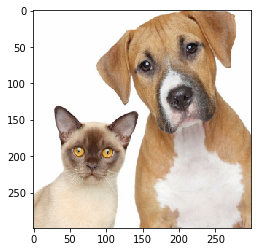

In [8]:
images = transform_img_fn(['cat_dog_portrait.jpg'])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = predict_fn(images)
for x in preds.argsort()[0][-5:]:
    print (x, names[x], preds[0,x])

Assing the classifiers to variables

In [9]:
X5 = preds.argsort()[0][-5]
X4 = preds.argsort()[0][-4]
X3 = preds.argsort()[0][-3]
X2 = preds.argsort()[0][-2]
X1 = preds.argsort()[0][-1]

In [10]:
image = images[0]

In [11]:
explainer = lime_image.LimeImageExplainer()

Obtain the explanations and its time

In [12]:
tmp = time.time()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)
print (time.time() - tmp)

312.11567544937134


## Show the different explanations

### Prediction Number 1

In [13]:
print (X1,"\t", names[X1],"\t", preds[0,X1])

243 	 boxer 	 0.6111166


Show only the prediction

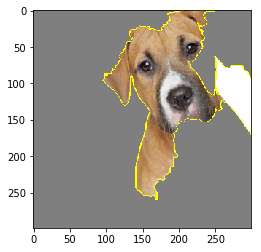

In [28]:
temp, mask = explanation.get_image_and_mask(X1, positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

show the prediction and the image

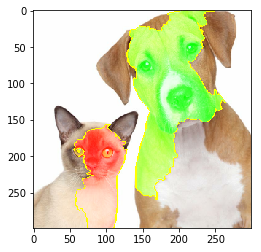

In [15]:
temp, mask = explanation.get_image_and_mask(X1, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Prediction Number 2

In [16]:
print (X2,"\t", names[X2],"\t", preds[0,X2])

244 	 bull mastiff 	 0.046208818


Show only the prediction

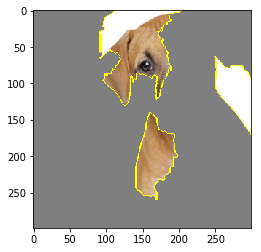

In [17]:
temp, mask = explanation.get_image_and_mask(X2, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

show the prediction and the image

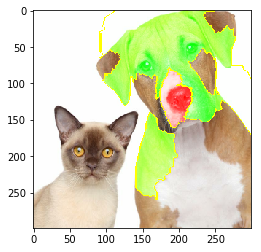

In [18]:
temp, mask = explanation.get_image_and_mask(X2, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Prediction Number 3

In [19]:
print (X3,"\t", names[X3],"\t", preds[0,X3])

181 	 American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier 	 0.02619149


Show only the prediction

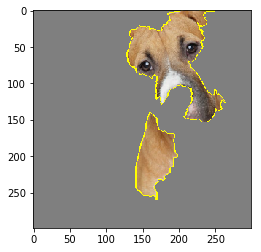

In [20]:
temp, mask = explanation.get_image_and_mask(X3, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

show the prediction and the image

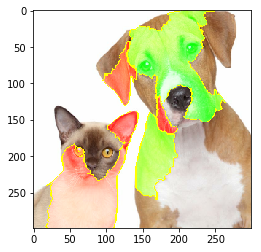

In [21]:
temp, mask = explanation.get_image_and_mask(X3, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Prediction Number 4

In [22]:
print (X4,"\t", names[X4],"\t", preds[0,X4])

248 	 Saint Bernard, St Bernard 	 0.0121978745


Show only the prediction

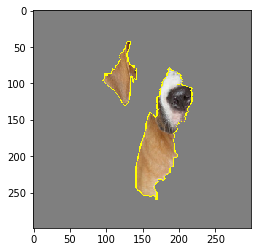

In [23]:
temp, mask = explanation.get_image_and_mask(X4, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

show the prediction and the image

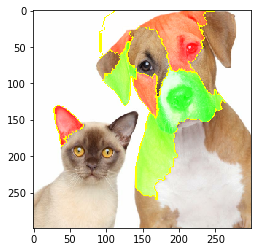

In [24]:
temp, mask = explanation.get_image_and_mask(X4, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Prediction Number 5

In [25]:
print (X5,"\t", names[X5],"\t", preds[0,X5])

160 	 Rhodesian ridgeback 	 0.0107092345


Show only the prediction

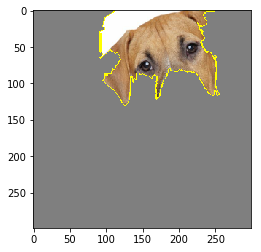

In [26]:
temp, mask = explanation.get_image_and_mask(X5, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

show the prediction and the image

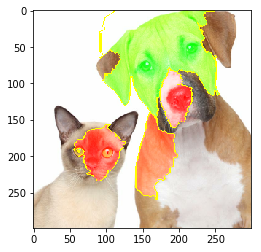

In [27]:
temp, mask = explanation.get_image_and_mask(X5, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))